In this exercise, the goal is to solve a multiclass classifier problem using KNN and PCA to reduce the number of features.

In [25]:
from keras.datasets import mnist,fashion_mnist

(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()  # load the database from the Keras library

# reshape to obtain a vector of 784 elements (features) for each image (samples)
X_train = X_train_raw.reshape(60000, -1)
X_test = X_test_raw.reshape(10000, -1)

# transform the data type to "float32"
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize by the maximum value that the pixels can have so that the values are between 0 and 1
X_train = X_train/255.0
X_test = X_test/255.0

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [26]:
# principal components of the training matrix are calculated

from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(X_train)
X_pca = pca.transform(X_train)

print('Dimensions of the matrix in principal components: {}'.format(X_pca.shape))

Dimensions of the matrix in principal components: (60000, 784)


Text(0.5, 0, 'Total principal components')

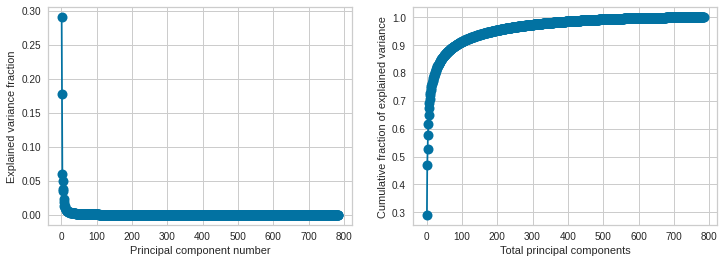

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# the fraction of information provided by each component is calculated
evr = pca.explained_variance_ratio_

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Explained variance fraction')
ax[0].set_xlabel('Principal component number')

cumulative_variance = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), cumulative_variance, '.-', markersize = 20)
ax[1].set_ylabel('Cumulative fraction of explained variance')
ax[1].set_xlabel('Total principal components')

In [28]:
for i in range(len(varianza_acumulada)):
  if cumulative_variance[i] > 0.9:
    print("The first " + str(i+1) + " principal components explain more than 90% of the variance")
    break


The first 84 principal components explain more than 90% of the variance


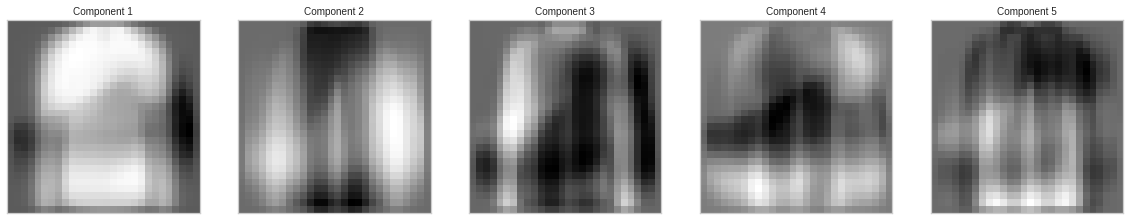

In [29]:
# display the first five components in order of explained variance

fig, ax = plt.subplots(1, 5, figsize = (20, 10))

for pc in range(5):

  ax[pc].imshow(pca.components_[pc].reshape(28, 28), interpolation='none', cmap="gray")
  
  ax[pc].set_title("Component {}".format(pc + 1), fontsize = 10)
  
  ax[pc].set_xticks([])
  ax[pc].set_yticks([])

plt.show()

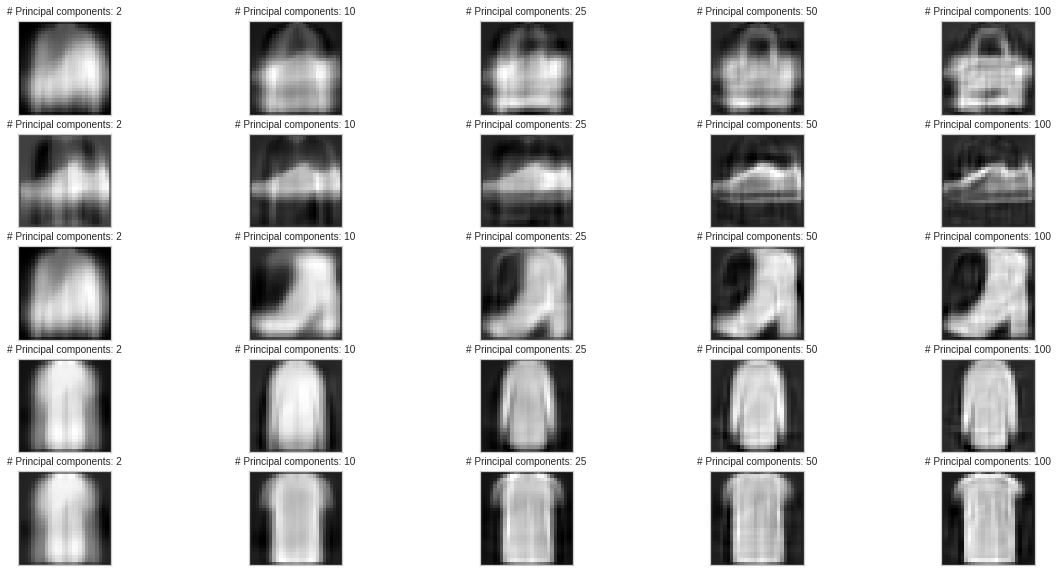

In [30]:
# five images were randomly selected and the reconstruction obtained using 2, 10, 25, 50 and 100 components is shown.

import random

ran = range(5)
clothesid = [random.randrange(1, 60000, 1) for i in ran] # random index list 


fig, ax = plt.subplots(5, 5, figsize = (20, 10))
for i in ran:
  fig_index = 0

  for p in [2, 10, 25, 50, 100]:

    pca = PCA(n_components = p)
    pca.fit(X_train)
    X_pca = pca.transform(X_train)
    X_r = pca.inverse_transform(X_pca)

    ax[i,fig_index].imshow(X_r[clothesid[i], :].reshape(28, 28), interpolation='none', cmap="gray")  
    ax[i,fig_index].set_title("# Principal components: {}".format(p), fontsize = 10)
    ax[i,fig_index].set_xticks([])
    ax[i,fig_index].set_yticks([])

    fig_index += 1

plt.show()

Text(0, 0.5, 'Second principal component')

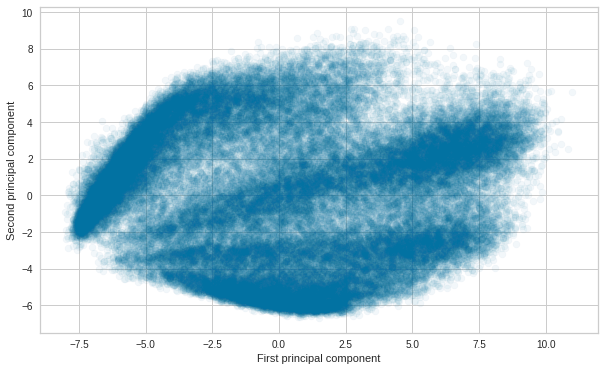

In [31]:
# the data is displayed in a reduced dimension space formed by the 1st vs. the 2nd principal components

fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(X_pca[:,0], X_pca[:,1], alpha = 0.05)

ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')

In [36]:
# KNN is applied and the accuracy scores are calculated

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from random import shuffle

X_pca_84 = X_pca[:,:84]

clf = KNeighborsClassifier(n_neighbors=5) # clasificador
clf.fit(X_pca_84, y_train)

X_pca_test = pca.transform(X_test)
X_pca_test_84 = X_pca_test[:,:84]


In [21]:
pip install -U yellowbrick

     |████████████████████████████████| 274 kB 9.2 MB/s 


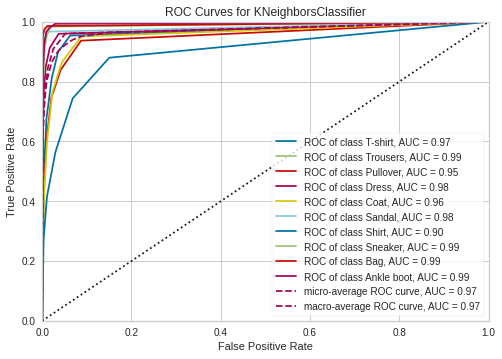

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f69ac2caa50>,
       encoder={0: 'T-shirt', 1: 'Trousers', 2: 'Pullover', 3: 'Dress',
                4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag',
                9: 'Ankle boot'},
       estimator=KNeighborsClassifier())

In [35]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'T-shirt', 
                                        1: 'Trousers', 
                                        2: 'Pullover',
                                        3: 'Dress', 
                                        4: 'Coat', 
                                        5: 'Sandal',
                                        6: 'Shirt', 
                                        7: 'Sneaker', 
                                        8: 'Bag', 
                                        9: 'Ankle boot'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

plot_ROC_curve(clf, X_pca_84, y_train, X_pca_test_84, y_test)